In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
from natsort import natsorted

In [2]:
Nx = 1000
x1 = -20.0
x2 = 20
X  = np.linspace(x1,x2,num=Nx, dtype=np.float32)

# Post-Process

In [5]:
loss= np.loadtxt('./GL_NN/output.dat',unpack = True)

Text(0, 0.5, 'Loss')

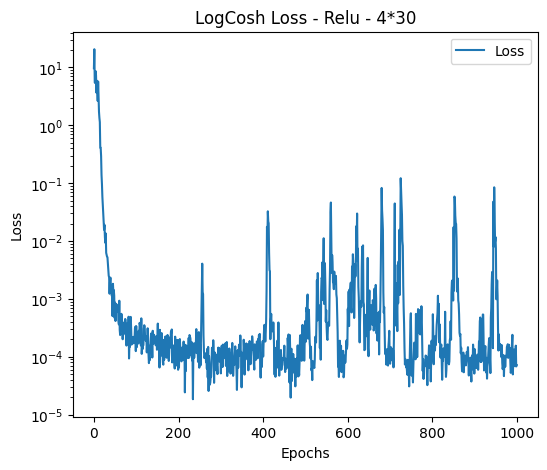

In [6]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

ax.set_yscale('log')

# Surface Plot

ax.plot(loss[0],loss[1])

ax.legend(['Loss'])

# Labels
plt.title("LogCosh Loss - Relu - 4*30")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

In [7]:
u = np.load("./GL_NN/U",allow_pickle=True)
v = np.load("./GL_NN/V",allow_pickle=True)

In [8]:
u[500:]

array([9.9757928e-01, 9.9274647e-01, 9.8491746e-01, 9.7318363e-01,
       9.6051329e-01, 9.4536823e-01, 9.2459720e-01, 9.0382600e-01,
       8.8187963e-01, 8.5665500e-01, 8.3021271e-01, 8.0259991e-01,
       7.7166975e-01, 7.3989338e-01, 7.0759475e-01, 6.7495233e-01,
       6.4230984e-01, 6.0754699e-01, 5.7457572e-01, 5.4182404e-01,
       5.0996447e-01, 4.7810507e-01, 4.4684494e-01, 4.1561487e-01,
       3.8676316e-01, 3.5835862e-01, 3.2995406e-01, 3.0227688e-01,
       2.7777892e-01, 2.5318599e-01, 2.3120221e-01, 2.1013129e-01,
       1.8895635e-01, 1.7008984e-01, 1.5504558e-01, 1.4000133e-01,
       1.2617020e-01, 1.1249904e-01, 9.9978387e-02, 8.7967008e-02,
       7.6146811e-02, 6.5759733e-02, 5.9620772e-02, 5.3219032e-02,
       4.6114203e-02, 3.9016332e-02, 3.1918917e-02, 2.7158108e-02,
       2.4561103e-02, 2.1964077e-02, 1.9367069e-02, 1.7308284e-02,
       1.5366286e-02, 1.3424236e-02, 1.1482209e-02, 9.5401779e-03,
       7.5981282e-03, 5.8795623e-03, 4.3192320e-03, 2.7588867e

Text(0, 0.5, 'Value')

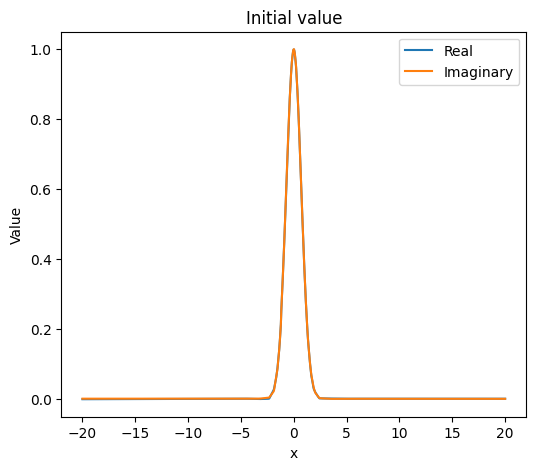

In [9]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

# Surface Plot

ax.plot(X,u)
ax.plot(X,v)

ax.legend(['Real', 'Imaginary'])

# Labels
plt.title("Initial value")
ax.set_xlabel('x')
ax.set_ylabel('Value')

In [15]:
u_list = natsorted(glob.glob('./GL_NN/U*'))
v_list = natsorted(glob.glob('./GL_NN/V*'))

x_list = natsorted(glob.glob('./GL_NN/X*'))

In [16]:
u_list

['./GL_NN/U',
 './GL_NN/U1',
 './GL_NN/U2',
 './GL_NN/U3',
 './GL_NN/U4',
 './GL_NN/U5']

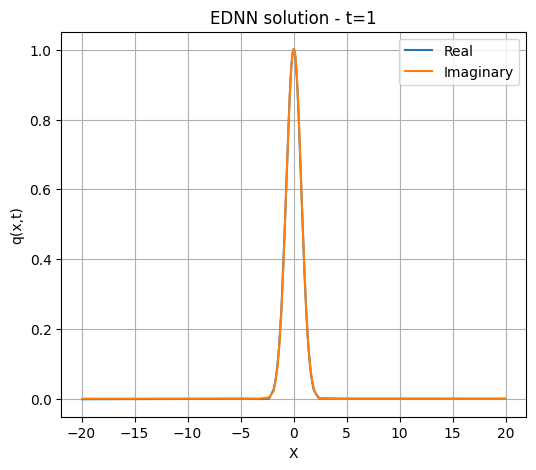

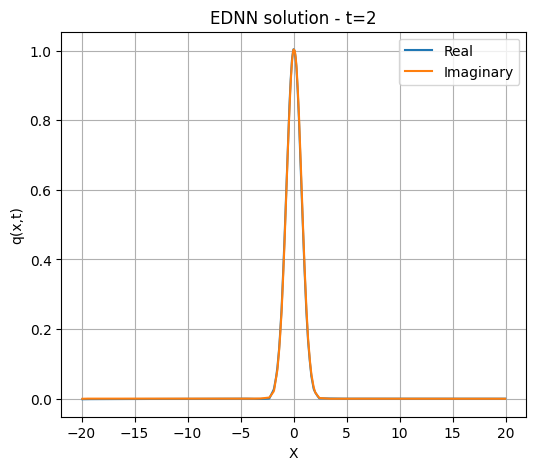

In [12]:
for i in range(1,len(u_list)):    
    x = np.load(x_list[i],allow_pickle=True)
    u = np.load(u_list[i],allow_pickle=True)
    v = np.load(v_list[i],allow_pickle=True)
    
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    ax.grid()

    # Surface Plot
    ax.plot(x,u)
    ax.plot(x,v)

    # Labels
    ax.legend(['Real', 'Imaginary'])
    ax.set_xlabel('X')
    ax.set_ylabel('q(x,t)')
    plt.title("EDNN solution - t={el}".format(el=i))
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

Text(0, 0.5, 'Value')

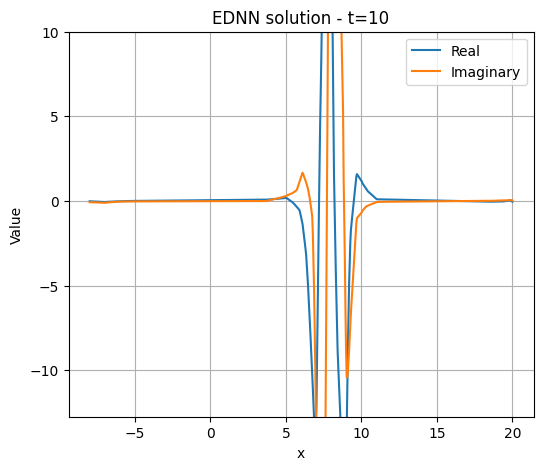

In [239]:
u = np.load(u_list[400],allow_pickle=True)
v = np.load(v_list[400],allow_pickle=True)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
# Surface Plot
plt.ylim(-12.75,10)
ax.plot(X[300:],u[300:])
ax.plot(X[300:],v[300:])

ax.legend(['Real', 'Imaginary'])

# Labels
plt.title("EDNN solution - t=10")
ax.set_xlabel('x')
ax.set_ylabel('Value')

In [13]:
z = np.stack([np.load(u_list[i],allow_pickle=True) for i in range(len(u_list))])

Text(0.5, 0, 'u')

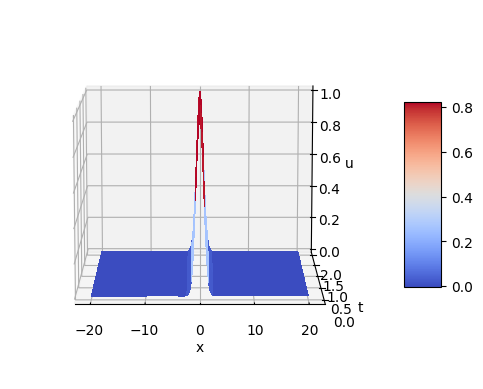

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Make data.
x = X
t = np.arange(0, len(u_list), 1)
x, t = np.meshgrid(x, t)
z = z

# Plot the surface.
surf = ax.plot_surface(x, t, z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.view_init(10, -90)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')